# Pandas basics: the cats dataset

- Downloading and reading CSV files into Pandas dataframes
- Structure of a dataframe
- Boolean indexing with `.loc` to extract parts of the data
- Basic data manipulation: summary statistics, sorting

`pandas.pydata.org`

---

## Datasets

[Pet Cats UK](https://github.com/rfordatascience/tidytuesday/tree/master/data/2023/2023-01-31)

Cat information:

`https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-01-31/cats_uk_reference.csv`

Cat activity log:

`https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-01-31/cats_uk.csv`

In [6]:
import pandas as pd

cat_info = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-01-31/cats_uk_reference.csv')
cat_info.head()

,tag_id,animal_id,animal_taxon,deploy_on_date,deploy_off_date,hunt,prey_p_month,animal_reproductive_condition,animal_sex,hrs_indoors,n_cats,food_dry,food_wet,food_other,study_site,age_years
0,Tommy-Tag,Tommy,Felis catus,2017-06-03T01:02:09Z,2017-06-10T02:10:52Z,True,12.5,Neutered,m,12.5,2,True,True,False,UK,11.0
1,Athena,Athena,Felis catus,2017-06-24T01:02:13Z,2017-06-30T23:59:32Z,True,3.0,Spayed,f,7.5,2,True,True,False,UK,3.0
2,Ares,Ares,Felis catus,2017-06-24T01:03:57Z,2017-06-30T23:58:01Z,NaN,0.0,Neutered,m,7.5,2,True,True,False,UK,3.0
3,Lola,Lola,Felis catus,2017-06-24T01:18:49Z,2017-06-30T09:04:40Z,True,3.0,Spayed,f,17.5,1,True,True,False,UK,10.0
4,Maverick,Maverick,Felis catus,2017-06-25T01:04:35Z,2017-07-03T09:10:07Z,True,3.0,Neutered,m,12.5,1,True,True,True,UK,7.0


In [7]:
cat_info.describe()

,prey_p_month,hrs_indoors,n_cats,age_years
count,101.000000,101.000000,101.000000,100.000000
mean,3.742574,11.856436,2.079208,5.420000
std,4.831467,5.227971,0.996827,3.384994
min,0.000000,2.500000,1.000000,0.000000
25%,0.500000,7.500000,1.000000,3.000000
50%,3.000000,12.500000,2.000000,5.000000
75%,3.000000,17.500000,3.000000,8.000000
max,17.500000,22.500000,4.000000,16.000000


In [8]:
cat_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tag_id                         101 non-null    object 
 1   animal_id                      101 non-null    object 
 2   animal_taxon                   101 non-null    object 
 3   deploy_on_date                 101 non-null    object 
 4   deploy_off_date                101 non-null    object 
 5   hunt                           92 non-null     object 
 6   prey_p_month                   101 non-null    float64
 7   animal_reproductive_condition  98 non-null     object 
 8   animal_sex                     101 non-null    object 
 9   hrs_indoors                    101 non-null    float64
 10  n_cats                         101 non-null    int64  
 11  food_dry                       101 non-null    bool   
 12  food_wet                       101 non-null    boo

In [11]:
# Only show name and age of the cats
# cat_info['animal_id']
# cat_info['age_years']
cat_info[['animal_id', 'age_years']]

,animal_id,age_years
0,Tommy,11.0
1,Athena,3.0
2,Ares,3.0
3,Lola,10.0
4,Maverick,7.0
...,...,...
96,Charlie3,5.0
97,Millie,3.0
98,SmokeyLongnose,9.0
99,CJ,5.0


In [16]:
# Show the names of only the female cats
selector = cat_info['animal_sex'] == 'f'
# print(selector)
cat_info.loc[selector, ['animal_id', 'age_years']]

,animal_id,age_years
1,Athena,3.0
3,Lola,10.0
5,Coco,7.0
9,Nettle,4.0
10,Meg,8.0
14,Jessy,11.0
16,Sparky,8.0
20,Mifty,2.0
23,Poppet,10.0
27,Tom,3.0


List the spayed/neutered female cats who are 10 years old or older, from oldest to youngest.

In [24]:
selector = (cat_info['animal_sex'] == 'f') & \
    (cat_info['age_years'] >= 10) & \
    ((cat_info['animal_reproductive_condition'] == 'Spayed') | \
        (cat_info['animal_reproductive_condition'] == 'Neutered'))
# print(selector)

old_female_cats = cat_info.loc[selector, ['animal_id', 'age_years']]
old_female_cats.sort_values(by=['age_years'], ascending=False)

,animal_id,age_years
58,Boots,16.0
57,Jezebel,14.0
44,Bits,13.0
47,Bobs,13.0
35,Bumbles,12.0
14,Jessy,11.0
3,Lola,10.0
33,Ebby,10.0
23,Poppet,10.0


## Week 9: more data manipulation

- Cross-referencing dataframes
- [The `str` accessor](https://pandas.pydata.org/docs/user_guide/text.html#string-methods)
- [Dealing with time data](https://pandas.pydata.org/docs/user_guide/timeseries.html#overview)
- [The `dt` accessor](https://pandas.pydata.org/docs/user_guide/basics.html#basics-dt-accessors)
- Creating new columns

In [1]:
import cats, importlib
import pandas as pd
importlib.reload(cats);
cat_info = cats.read_data('cats_uk_reference.csv')

In [2]:
activity = cats.read_data('cats_uk.csv')
# activity.columns
activity.info()
activity.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18215 entries, 0 to 18214
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18215 non-null  int64  
 1   tag_id                    18215 non-null  object 
 2   event_id                  18215 non-null  int64  
 3   visible                   18215 non-null  bool   
 4   timestamp                 18215 non-null  object 
 5   location_long             18215 non-null  float64
 6   location_lat              18215 non-null  float64
 7   ground_speed              18215 non-null  int64  
 8   height_above_ellipsoid    18215 non-null  float64
 9   algorithm_marked_outlier  18215 non-null  bool   
 10  manually_marked_outlier   18215 non-null  bool   
 11  study_name                18215 non-null  object 
dtypes: bool(3), float64(3), int64(3), object(3)
memory usage: 1.3+ MB


,Unnamed: 0,tag_id,event_id,visible,timestamp,location_long,location_lat,ground_speed,height_above_ellipsoid,algorithm_marked_outlier,manually_marked_outlier,study_name
0,0,Ares,3395610551,True,2017-06-24T01:03:57Z,-5.113851,50.170315,684,154.67,False,False,Pet Cats United Kingdom
1,1,Ares,3395610552,True,2017-06-24T01:11:20Z,-5.113851,50.170315,936,154.67,False,False,Pet Cats United Kingdom
2,2,Ares,3395610553,True,2017-06-24T02:58:16Z,-5.113730,50.169876,2340,81.35,False,False,Pet Cats United Kingdom
3,3,Ares,3395610554,True,2017-06-24T03:01:26Z,-5.113774,50.169827,0,67.82,False,False,Pet Cats United Kingdom
4,4,Ares,3395610555,True,2017-06-24T03:51:58Z,-5.114247,50.170139,4896,118.03,False,False,Pet Cats United Kingdom


In [3]:
cat_info.info()
cat_info.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     101 non-null    int64  
 1   tag_id                         101 non-null    object 
 2   animal_id                      101 non-null    object 
 3   animal_taxon                   101 non-null    object 
 4   deploy_on_date                 101 non-null    object 
 5   deploy_off_date                101 non-null    object 
 6   hunt                           92 non-null     object 
 7   prey_p_month                   101 non-null    float64
 8   animal_reproductive_condition  98 non-null     object 
 9   animal_sex                     101 non-null    object 
 10  hrs_indoors                    101 non-null    float64
 11  n_cats                         101 non-null    int64  
 12  food_dry                       101 non-null    boo

,Unnamed: 0,tag_id,animal_id,animal_taxon,deploy_on_date,deploy_off_date,hunt,prey_p_month,animal_reproductive_condition,animal_sex,hrs_indoors,n_cats,food_dry,food_wet,food_other,study_site,age_years
0,0,Tommy-Tag,Tommy,Felis catus,2017-06-03T01:02:09Z,2017-06-10T02:10:52Z,True,12.5,Neutered,m,12.5,2,True,True,False,UK,11.0
1,1,Athena,Athena,Felis catus,2017-06-24T01:02:13Z,2017-06-30T23:59:32Z,True,3.0,Spayed,f,7.5,2,True,True,False,UK,3.0
2,2,Ares,Ares,Felis catus,2017-06-24T01:03:57Z,2017-06-30T23:58:01Z,NaN,0.0,Neutered,m,7.5,2,True,True,False,UK,3.0
3,3,Lola,Lola,Felis catus,2017-06-24T01:18:49Z,2017-06-30T09:04:40Z,True,3.0,Spayed,f,17.5,1,True,True,False,UK,10.0
4,4,Maverick,Maverick,Felis catus,2017-06-25T01:04:35Z,2017-07-03T09:10:07Z,True,3.0,Neutered,m,12.5,1,True,True,True,UK,7.0


In [14]:
# Find the activity for male cats whose name
# starts with P

# cat_info['animal_id']
# print(cat)

selector = (cat_info['animal_id'].str.startswith('A')) & \
    (cat_info['animal_sex'] == 'm')

a_cats = cat_info.loc[selector, 'tag_id']
a_cats

2          Ares
92    Alfie-Tag
Name: tag_id, dtype: object

In [100]:
cat_name = 'Johnny'
# cat_name[0] == 'P'
cat_name.startswith('J')

True

In [24]:
# Find the cats in the activity dataframe
selector = activity['tag_id'].isin(a_cats)
# activity.loc[selector]['tag_id'].unique()
a_cats_activity = activity.loc[selector, ['tag_id', 'timestamp', 'location_long', 'location_lat']]
a_cats_activity

,tag_id,timestamp,location_long,location_lat
0,Ares,2017-06-24T01:03:57Z,-5.113851,50.170315
1,Ares,2017-06-24T01:11:20Z,-5.113851,50.170315
2,Ares,2017-06-24T02:58:16Z,-5.113730,50.169876
3,Ares,2017-06-24T03:01:26Z,-5.113774,50.169827
4,Ares,2017-06-24T03:51:58Z,-5.114247,50.170139
...,...,...,...,...
16792,Alfie-Tag,2017-10-30T08:34:16Z,-4.757345,50.342976
16793,Alfie-Tag,2017-10-30T10:03:01Z,-4.758747,50.343243
16794,Alfie-Tag,2017-10-30T10:11:09Z,-4.759846,50.343201
16795,Alfie-Tag,2017-10-30T10:14:36Z,-4.759074,50.343533


In [28]:
# a_cats_activity.info()
a_cats_activity['timestamp'] = pd.to_datetime(a_cats_activity['timestamp'])

In [44]:
# a_cats_activity.iloc[0]['timestamp'].dayofweek
print(a_cats_activity.iloc[0]['timestamp'])
print(a_cats_activity.iloc[0]['timestamp'].minute)

print(a_cats_activity['timestamp'].dt.minute)

2017-06-24 01:03:57+00:00
3
0         3
1        11
2        58
3         1
4        51
         ..
16792    34
16793     3
16794    11
16795    14
16796    20
Name: timestamp, Length: 290, dtype: int32


In [42]:
time_elapsed = a_cats_activity.iloc[1]['timestamp'] - a_cats_activity.iloc[0]['timestamp']
time_elapsed.total_seconds()

443.0

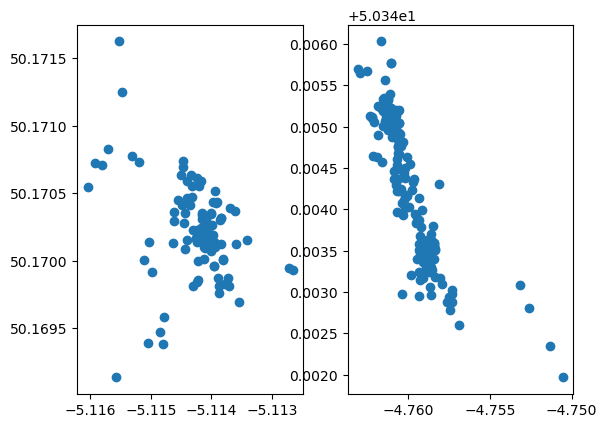

In [48]:
# See where the cats have gone
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2)
ares_activity = a_cats_activity.loc[a_cats_activity['tag_id'] == 'Ares']
alfie_activity = a_cats_activity.loc[a_cats_activity['tag_id'] == 'Alfie-Tag']
ax[0].scatter(ares_activity['location_long'], ares_activity['location_lat'])
ax[1].scatter(alfie_activity['location_long'], alfie_activity['location_lat'])
plt.show()

# Exercise:
# - Make this more robust if I don't know how many cats I have
# - Think about a way to represent the time data

In [51]:
# a_cats_activity.loc[a_cats_activity['tag_id'] == 'Ares']
# a_cats_activity.loc['tag_id' == 'Ares']
# 'tag_id' == 'Ares'

selector = a_cats_activity['tag_id'] == 'Ares'
a_cats_activity.loc[selector]

,tag_id,timestamp,location_long,location_lat
0,Ares,2017-06-24 01:03:57+00:00,-5.113851,50.170315
1,Ares,2017-06-24 01:11:20+00:00,-5.113851,50.170315
2,Ares,2017-06-24 02:58:16+00:00,-5.113730,50.169876
3,Ares,2017-06-24 03:01:26+00:00,-5.113774,50.169827
4,Ares,2017-06-24 03:51:58+00:00,-5.114247,50.170139
...,...,...,...,...
98,Ares,2017-06-30 22:37:08+00:00,-5.114180,50.170593
99,Ares,2017-06-30 22:55:01+00:00,-5.114440,50.170086
100,Ares,2017-06-30 22:58:01+00:00,-5.115032,50.170139
101,Ares,2017-06-30 23:54:37+00:00,-5.114236,50.170231
